<a href="https://colab.research.google.com/github/yudhiesh1997/Optimisation-Deep-Learning/blob/master/LinearRegressionSGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("/content/Data_SLR.csv")

In [2]:
data.head()

,LSTAT,PRICE
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LSTAT   506 non-null    float64
 1   PRICE   506 non-null    float64
dtypes: float64(2)
memory usage: 8.0 KB


In [4]:
print(f'Number of null values: {data.isnull().sum().sum()}')

Number of null values: 0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = data["LSTAT"].values
y = data["PRICE"].values

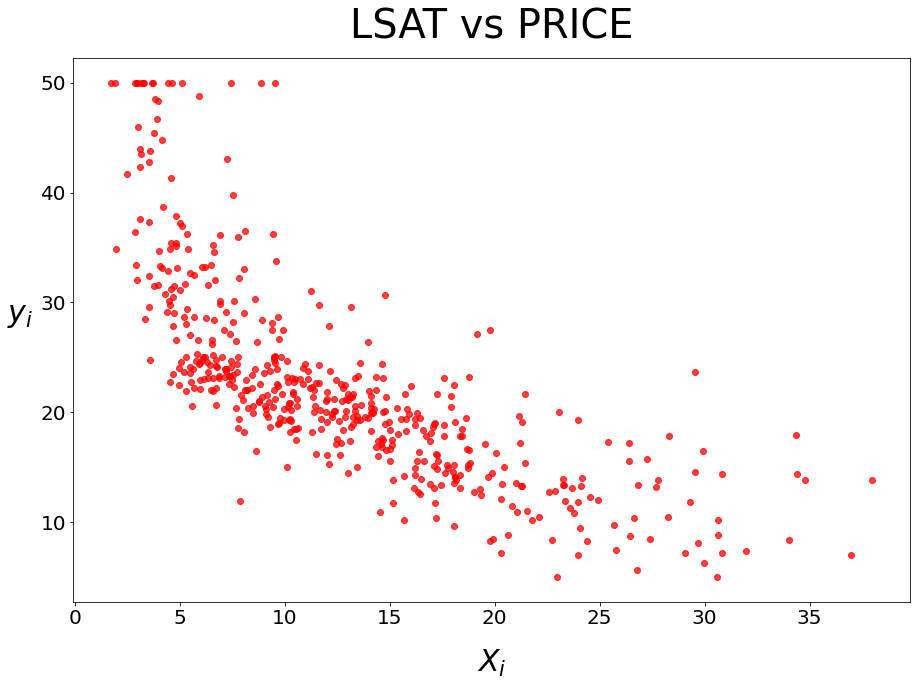

In [16]:
plt.figure(figsize=(15,10))
plt.scatter(X,y, alpha=0.75, color="r")
plt.xlabel("$X_i$", size=30, labelpad=20)
plt.ylabel("$y_i$", size=30, rotation=0, labelpad=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.title("LSAT vs PRICE", size=40, pad= 20)
plt.show()

In [7]:
X = X.reshape(-1,1)

In [8]:
# y = y.reshape(-1,1)

In [9]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
lin_reg = LinearRegression(normalize=True, n_jobs=-1)
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [21]:
r2 = lin_reg.score(X_test, y_test)
print(f'R-squared : {r2:.4f}')

R-squared : 0.5429


In [25]:
print(f'Intercept (b0) : {lin_reg.intercept_}\nSlope (b1) : {lin_reg.coef_}' ) 

Intercept (b0) : 34.83694982031851
Slope (b1) : [-0.9665309]


In [24]:
lin_reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'normalize': True}

In [12]:
y_predict = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_predict)

In [30]:
print(f'Predicted responses: ',y_predict, sep="\n" )

Predicted responses: 
[26.09951047 31.42509574 17.37173642 29.50169924 18.14496114 23.26757492
 17.12043839 11.48556323 22.39769711 20.986562   17.51671606 18.3092714
 -0.90536293 22.90995849 23.48987703 23.5671995  17.84533656  5.2417736
 31.96635304 17.31374457 28.46751118 27.88759264 12.99335144 25.490596
 19.66241466 17.30407926 26.04151861 16.75315664 18.14496114 21.2088641
 20.63861087 27.87792733 21.8467745  24.98799993 14.23051099 19.57542688
 30.94183029 25.36494698 20.6676068  27.54930682 14.40448655 27.55897213
 32.05334082 22.18506031 26.32181257 18.29960609 17.10110777 28.34186216
 19.09216143 30.02362593 22.01108475 30.40057298 16.74349134 27.4236578
 31.78271217 24.61105288 18.80220216 31.61840192 25.53892254 16.99478937
 25.65490625 30.18793618 31.20279363 23.53820358 29.53069517 12.51975129
 18.28994078 28.34186216 30.66153632 16.46319737 21.16053756 27.35600064
 11.84317966 29.4533727  24.91067746  5.27076953 22.9196238  31.15446708
 14.46247841 11.6692041  26.3411431

In [28]:
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 33.52


In [29]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse:.2f}')

Root Mean Squared Error: 5.79


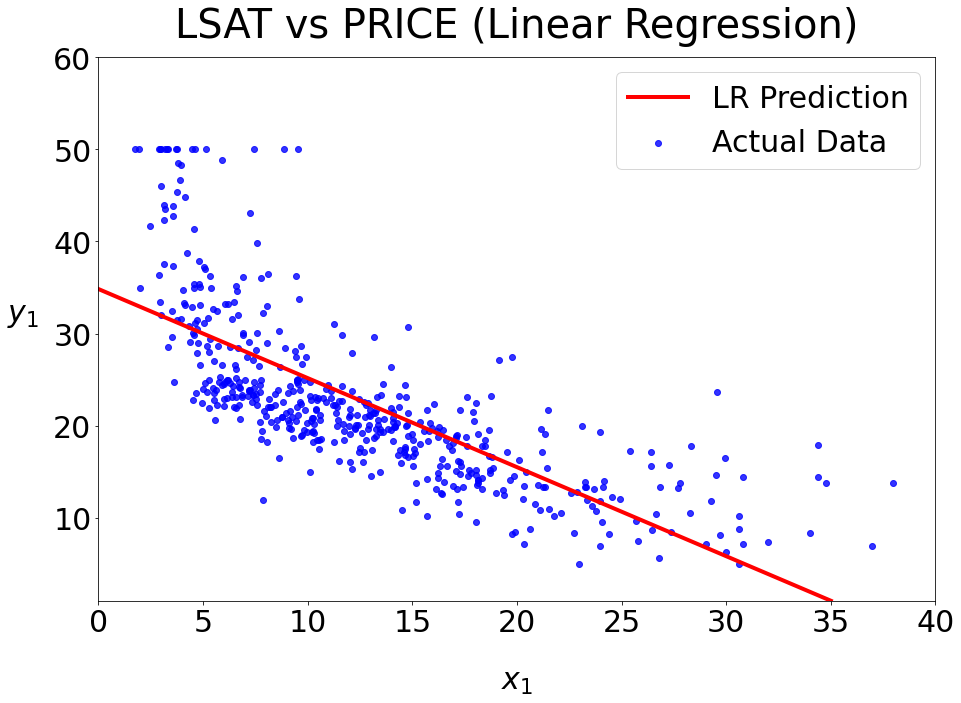

In [59]:
plt.figure(figsize=(15,10))
X_new=np.linspace(0, 35, 100).reshape(100, 1)
y_new = lin_reg.predict(X_new)
plt.scatter(X,y, color="b", alpha=0.8, label="Actual Data")
plt.plot(X_new, y_new, "r-", linewidth=4, label="LR Prediction")
plt.xlabel("$x_1$", fontsize=18, size=30, labelpad=30)
plt.ylabel("$y_1$", rotation=0, size=30, labelpad=30)
plt.legend(loc="best", fontsize=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.title("LSAT vs PRICE (Linear Regression)", size=40, pad= 20)
plt.axis([0, 40, 1, 60])
plt.show()

In [72]:
# SGD Regressor 1
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score, mean_squared_error
sgd = SGDRegressor(random_state=42)
sgd.fit(X_train, y_train)

r2_2 = sgd.score(X_test, y_test)
print(f'R2 score {r2_2:.2f}')

y_pred2 = sgd.predict(X_test)
mse2 = mean_squared_error(y_test, y_pred2)
print(f'MSE : {mse2:.2f}')

print(f'Coefficients : {sgd.coef_}')
print(f'Y_Intercept : {sgd.intercept_}')


R2 score 0.53
MSE : 34.77
Coefficients : [-0.82390703]
Y_Intercept : [33.81609188]


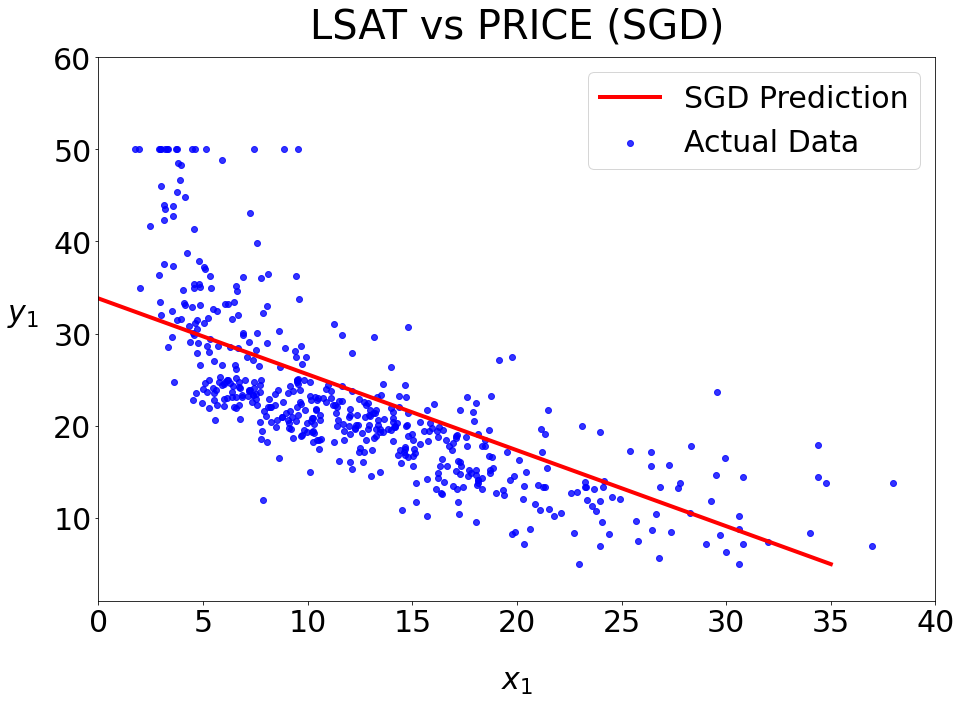

In [73]:
plt.figure(figsize=(15,10))
X_new=np.linspace(0, 35, 100).reshape(100, 1)
y_new = sgd.predict(X_new)
plt.scatter(X,y, color="b", alpha=0.8, label="Actual Data")
plt.plot(X_new, y_new, "r-", linewidth=4, label="SGD Prediction")
plt.xlabel("$x_1$", fontsize=18, size=30, labelpad=30)
plt.ylabel("$y_1$", rotation=0, size=30, labelpad=30)
plt.legend(loc="best", fontsize=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.title("LSAT vs PRICE (SGD)", size=40, pad= 20)
plt.axis([0, 40, 1, 60])
plt.show()

In [74]:
# SGD Regressor 2

sgd2 = SGDRegressor(random_state=42, max_iter=5000)
sgd2.fit(X_train, y_train)

r2_3 = sgd2.score(X_test, y_test)
print(f'R2 score {r2_3:.2f}')

y_pred3 = sgd.predict(X_test)
mse3 = mean_squared_error(y_test, y_pred3)
print(f'MSE : {mse3:.2f}')

print(f'Coefficients : {sgd2.coef_}')
print(f'Y_Intercept : {sgd2.intercept_}')


R2 score 0.53
MSE : 34.77
Coefficients : [-0.82390703]
Y_Intercept : [33.81609188]


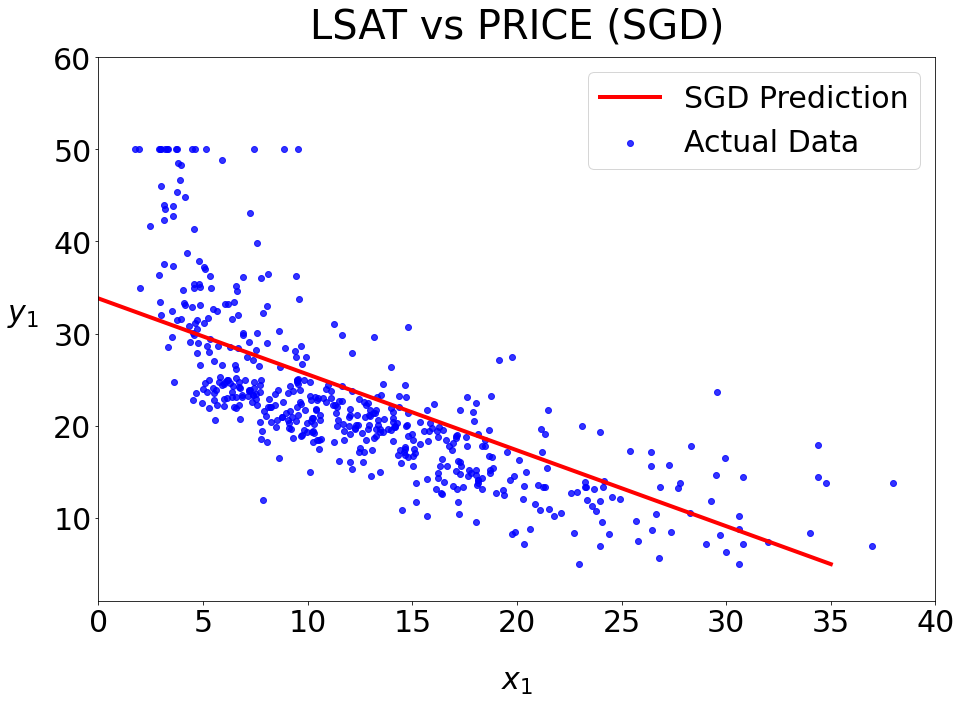

In [67]:
plt.figure(figsize=(15,10))
X_new=np.linspace(0, 35, 100).reshape(100, 1)
y_new = sgd2.predict(X_new)
plt.scatter(X,y, color="b", alpha=0.8, label="Actual Data")
plt.plot(X_new, y_new, "r-", linewidth=4, label="SGD Prediction")
plt.xlabel("$x_1$", fontsize=18, size=30, labelpad=30)
plt.ylabel("$y_1$", rotation=0, size=30, labelpad=30)
plt.legend(loc="best", fontsize=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.title("LSAT vs PRICE (SGD)", size=40, pad= 20)
plt.axis([0, 40, 1, 60])
plt.show()

In [82]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "loss": ("squared_loss", "huber"),
    "penalty": ('l2', 'l1', "elasticnet"),
    "alpha": [1e-6, 1e-5, 1e-4,1e-3, 1e-2, 1e-1, 1],
    "max_iter": [5000,10000, 20000]
}

sgd3 = SGDRegressor(random_state=42)
clf = GridSearchCV(sgd3, parameters)
clf.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=42, shuffle=True,
                                    tol=0.001, validation_fraction=0.1,
                                    verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'loss': ('squared_loss', 'huber'),
                         'max_iter': [5000, 10000, 20000],
                         'penalty': ('l2', 'l1', 'elasticnet')},
           

In [83]:
clf.estimator.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [84]:
clf.best_params_

{'alpha': 0.1, 'loss': 'squared_loss', 'max_iter': 5000, 'penalty': 'l2'}

In [85]:
clf.best_score_

0.5033668034478163

In [86]:
clf.best_estimator_.intercept_

array([33.79846582])

In [87]:
clf.best_estimator_.coef_

array([-0.82262034])

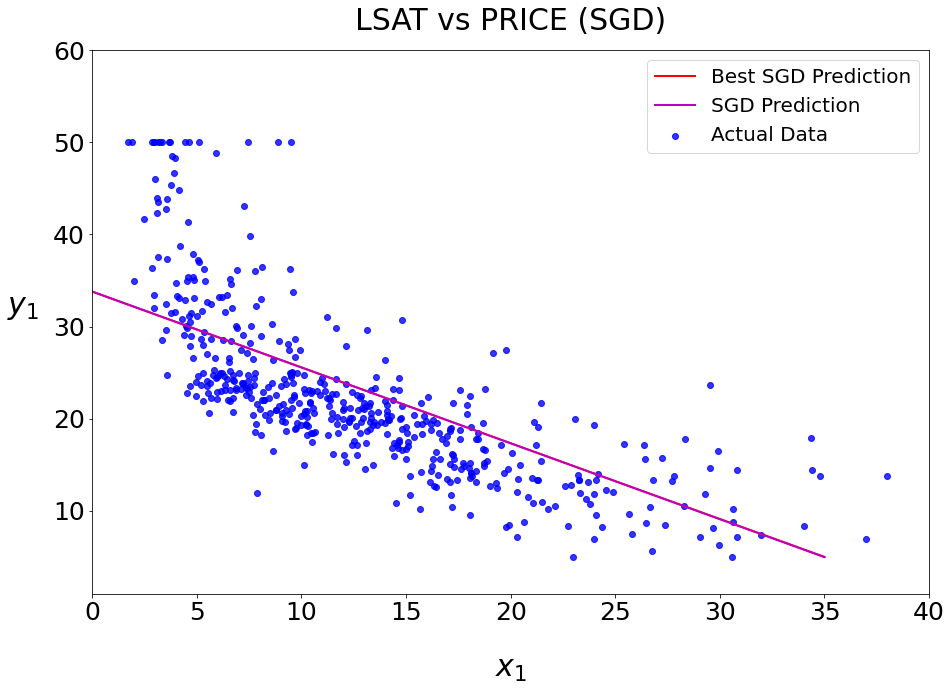

In [99]:
plt.figure(figsize=(15,10))
X_new=np.linspace(0, 35, 100).reshape(100, 1)
y_new = clf.predict(X_new)
y_new2 = sgd.predict(X_new)
plt.scatter(X,y, color="b", alpha=0.8, label="Actual Data")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Best SGD Prediction")
plt.plot(X_new, y_new2, "m-", linewidth=2, label="SGD Prediction")
plt.xlabel("$x_1$", fontsize=18, size=30, labelpad=30)
plt.ylabel("$y_1$", rotation=0, size=30, labelpad=30)
plt.legend(loc="best", fontsize=20)
plt.xticks(size=25)
plt.yticks(size=25)
plt.title("LSAT vs PRICE (SGD)", size=30, pad= 20)
plt.axis([0, 40, 1, 60])
plt.show()

In [ ]:
|